In [13]:
'''
Calculate heat load on SNSPD # https://en.wikipedia.org/wiki/Stefan–Boltzmann_law

'''
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
T = np.arange(0,10)
sigma = 5.670374419e-8 # W⋅m−2⋅K−4.
epsilon = 1 #emissivity of aluminum, does this depend on temperature
# 1 for black body, close to 0 for shiny mirror materials
# about 0.1-0.2 for aluminum https://www.flukeprocessinstruments.com/en-us/service-and-support/knowledge-center/infrared-technology/emissivity-metals
M = epsilon * sigma * T**4 #power per unit area

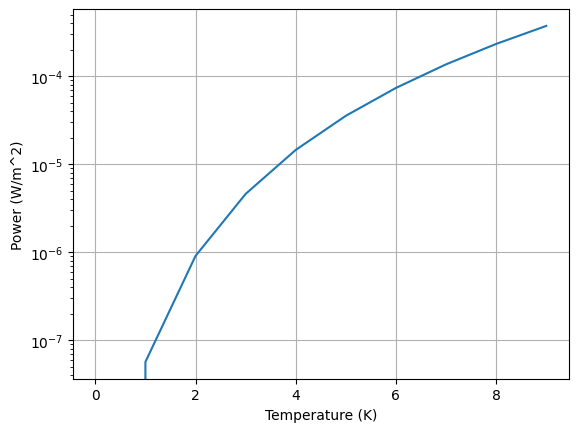

In [15]:
plt.plot(T, M)
plt.ylabel('Power (W/m^2)')
plt.xlabel('Temperature (K)')
plt.grid()
plt.yscale('log')
plt.show()

In [19]:
## calculate surface area

R = 0.2 # 0.2m or 20cm
L = 2*2**0.5*R
outer_area = 2*math.pi*R*L
# assume surface area would be the same as paraboloid: https://mathworld.wolfram.com/Paraboloid.html
parabola = math.pi*R/(6*L**2)*((R**2+4*L**2)**(3./2)-R**3)
print(outer_area, parabola)

0.7108612701053387 0.49367659085438936


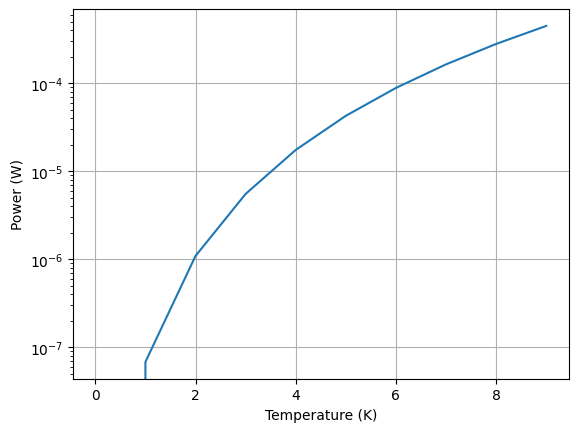

In [20]:
plt.plot(T, M*(outer_area+parabola))
plt.ylabel('Power (W)')
plt.xlabel('Temperature (K)')
plt.grid()
plt.yscale('log')
plt.show()

In [ ]:
### calculate intensity from planck's law

k = 1.380649e-23 #J/K
h = 6.62607015e-34 #Js
c = 3e8 #m/s

In [132]:
lam = np.arange(0.01,6) #um
lam_m = lam*1e-6 #m
photonN = {}
intensity = {}
T_list = [40]
for T in T_list:
#### Spectral Radiance
    intensity[T] = 2*h*c**2/lam_m**5/(np.exp(h*c/lam_m/k/T)-1)/1e6
    photonN[T] = 2*c/lam_m**4/(np.exp(h*c/lam_m/k/T)-1)/1e6


/var/folders/h_/07hdswkd45z90tw074d3zmnc0000gn/T/ipykernel_9385/1382057994.py:8: RuntimeWarning: overflow encountered in exp
  intensity[T] = 2*h*c**2/lam_m**5/(np.exp(h*c/lam_m/k/T)-1)/1e6
/var/folders/h_/07hdswkd45z90tw074d3zmnc0000gn/T/ipykernel_9385/1382057994.py:9: RuntimeWarning: overflow encountered in exp
  photonN[T] = 2*c/lam_m**4/(np.exp(h*c/lam_m/k/T)-1)/1e6


40 	 5.983183731511371e-08


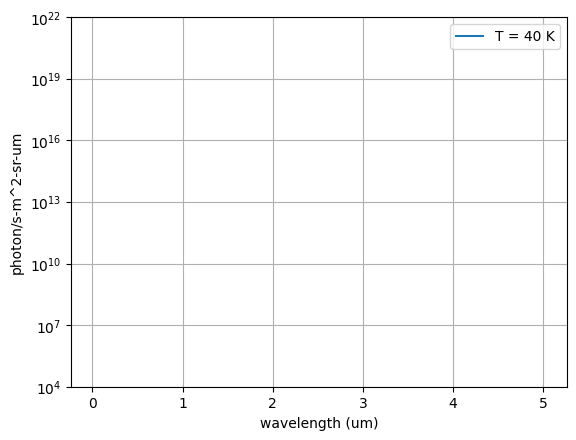

[0.00000000e+000 9.71053539e-129 6.21651118e-053 8.50900973e-028
 2.41374432e-015 5.98318349e-008]


In [133]:
# photon number
for T in T_list:
    plt.plot(lam, photonN[T], label = 'T = {} K'.format(T))
    print(T, '\t', np.sum(photonN[T][lam<100]))
plt.ylabel('photon/s-m^2-sr-um')
plt.xlabel('wavelength (um)')
plt.grid()
plt.legend()
plt.legend(loc="upper right")
plt.yscale('log')
# plt.xscale('log')
plt.ylim((1e4,1e22))

plt.show()
print(photonN[T])

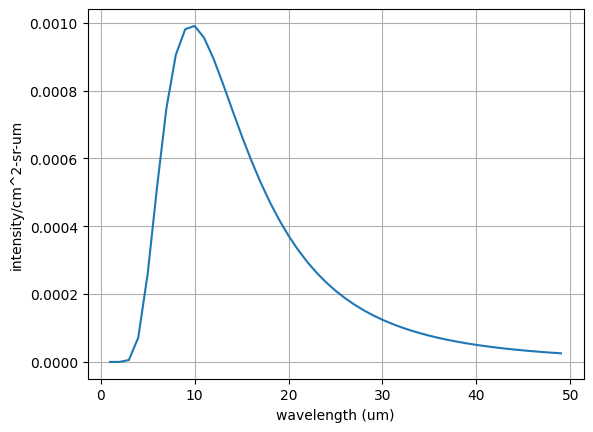

In [53]:
plt.plot(lam, intensity)
plt.ylabel('intensity/m^2-sr-um')
plt.xlabel('wavelength (um)')
plt.grid()
# plt.yscale('log')
plt.show()